–ë–∏–±–ª–∏–æ—Ç–µ–∫–∏:

In [1]:
!pip install catboost

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 98.7/98.7 MB 6.7 MB/s eta 0:00:00


In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error

In [4]:
# –∑–∞–≥—Ä—É–∂–∞–µ–º –æ–±—Ä–∞–±–æ—Ç–∞–Ω–Ω—ã–π –¥—Ñ
df = pd.read_csv('/content/drive/MyDrive/for_model_ver2.csv', sep = ',')
df.head(10)

Unnamed: 0  location  floor  floors_count  rooms_count  total_meters  \
0           1        27      1             9            1          33.0   
1           4        27      4             7            1          25.9   
2           9        27      6             9            2          42.7   
3          10        27      1             5            2          42.8   
4          13        27      1             3            1          25.3   
5          17        27      2             4            1          41.4   
6          18        27      2             2            1          31.3   
7          19        27      5             5            1          31.0   
8          23        27      6             6            1          38.9   
9          26        27      8            10            3          64.0   

   year_of_construction  object_type  have_loggia  parking_type  \
0                1975.0            1            0             0   
1                2009.0            1            0             2   
2                1980.0            1            2             2   
3                1990.0            1            1             2   
4                2015.0            1            2             0   
5                1975.0            1            1             2   
6                1970.0            1            0             2   
7                1984.0            1            1             2   
8                2010.0            1            2             0   
9                1992.0            1            2             2   

   living_meters  kitchen_meters  ceiling_height  street  underground  \
0           18.0             6.0            2.70     160            1   
1           20.0             5.0            3.50     671            0   
2           29.7             5.6            2.70     831            0   
3           24.9             6.0            2.50     711            0   
4           14.1             6.2            2.80     599            0   
5           20.0             7.0            2.82    1418            0   
6           26.3             5.0            2.82     563            0   
7           15.0             7.3            2.82     124            0   
8           16.0            10.0            2.80     432            0   
9           55.0             9.0            2.80     899            0   

   price_per_square_meter  
0                125757.0  
1                115830.0  
2                 93442.0  
3                 70070.0  
4                 98814.0  
5                 67632.0  
6                 86261.0  
7                 99677.0  
8                 71979.0  
9                116406.0

In [6]:
# –¥—Ä–æ–ø–∞–µ–º –≤—Ç–æ—Ä—É—é –∫–æ–ª–æ–Ω–∫—É
df.drop(['Unnamed: 0'], axis = 1, inplace=True)

In [7]:
# —Å–º–æ—Ç—Ä–∏–º —Ä–∞–∑–º–µ—Ä –¥—Ñ
df.shape

(3291, 15)

3315 —Å—Ç—Ä–æ–∫ –∏ 15 –∫–æ–ª–æ–Ω–æ–∫

In [8]:
# —É–¥–∞–ª—è–µ–º –∫–æ–ª–æ–Ω–∫—É —Å —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π
df.drop(['price_per_square_meter'], axis = 1)

location  floor  floors_count  rooms_count  total_meters  \
0           27      1             9            1          33.0   
1           27      4             7            1          25.9   
2           27      6             9            2          42.7   
3           27      1             5            2          42.8   
4           27      1             3            1          25.3   
...        ...    ...           ...          ...           ...   
3286        20      9            10            2          53.0   
3287        20     17            17            2          52.2   
3288        20      2             7            2          60.0   
3289        20      8            14            2          69.7   
3290        20      3             6            2          34.0   

      year_of_construction  object_type  have_loggia  parking_type  \
0                   1975.0            1            0             0   
1                   2009.0            1            0             2   
2                   1980.0            1            2             2   
3                   1990.0            1            1             2   
4                   2015.0            1            2             0   
...                    ...          ...          ...           ...   
3286                2005.0            1            1             2   
3287                2013.0            1            1             2   
3288                2017.0            1            0             4   
3289                2018.0            1            0             0   
3290                2023.0            1            1             3   

      living_meters  kitchen_meters  ceiling_height  street  underground  
0              18.0             6.0            2.70     160            1  
1              20.0             5.0            3.50     671            0  
2              29.7             5.6            2.70     831            0  
3              24.9             6.0            2.50     711            0  
4              14.1             6.2            2.80     599            0  
...             ...             ...             ...     ...          ...  
3286           28.0            11.0            2.60    1255            1  
3287           27.0            10.9            2.80       8            1  
3288           35.0            18.0            2.85    1057            1  
3289           38.0            10.5            2.82    1238            1  
3290           19.0             8.0            2.75    1289            1  

[3291 rows x 14 columns]

# –†–∞–∑–±–∏–µ–Ω–∏–µ –¥–∞—Ç–∞—Å–µ—Ç–∞ –Ω–∞ –æ–±—É—á–∞—é—â—É—é –∏ —Ç–µ—Å—Ç–æ–≤—É—é –≤—ã–±–æ—Ä–∫–∏

In [9]:
# —Ö - –¥–∞–Ω–Ω—ã–µ –±–µ–∑ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π
X = np.array(df[df._get_numeric_data().columns].drop('price_per_square_meter', axis=1))
# —É - —Ü–µ–ª–µ–≤–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è
y = np.array(df['price_per_square_meter'])

–ü—Ä–æ–≤–µ—Ä–∫–∞:

In [10]:
X

array([[2.700e+01, 1.000e+00, 9.000e+00, ..., 2.700e+00, 1.600e+02,
        1.000e+00],
       [2.700e+01, 4.000e+00, 7.000e+00, ..., 3.500e+00, 6.710e+02,
        0.000e+00],
       [2.700e+01, 6.000e+00, 9.000e+00, ..., 2.700e+00, 8.310e+02,
        0.000e+00],
       ...,
       [2.000e+01, 2.000e+00, 7.000e+00, ..., 2.850e+00, 1.057e+03,
        1.000e+00],
       [2.000e+01, 8.000e+00, 1.400e+01, ..., 2.820e+00, 1.238e+03,
        1.000e+00],
       [2.000e+01, 3.000e+00, 6.000e+00, ..., 2.750e+00, 1.289e+03,
        1.000e+00]])

In [11]:
y

array([125757., 115830.,  93442., ..., 199166., 163558., 188235.])

In [12]:
# —Å—Ç–∞–Ω–¥–∞—Ä—Ç–∏–∑–∞—Ü–∏—è –¥–∞–Ω–Ω—ã—Ö
X = scale(np.array(X, dtype='float'), with_std=True, with_mean=True)

In [13]:
X

array([[ 0.95270508, -1.20546422, -0.73549253, ..., -0.39591349,
        -1.4244811 ,  0.63467574],
       [ 0.95270508, -0.6616669 , -1.02184128, ...,  3.2622638 ,
        -0.26929207, -1.57560772],
       [ 0.95270508, -0.29913535, -0.73549253, ..., -0.39591349,
         0.09241095, -1.57560772],
       ...,
       [ 0.39435902, -1.02419845, -1.02184128, ...,  0.28999475,
         0.60331646,  0.63467574],
       [ 0.39435902,  0.0633962 , -0.01962068, ...,  0.1528131 ,
         1.012493  ,  0.63467574],
       [ 0.39435902, -0.84293267, -1.16501565, ..., -0.16727741,
         1.12778584,  0.63467574]])

–†–∞–∑–±–∏–≤–∞–µ–º –Ω–∞ –æ–±—É—á–∞—é—â—É—é –∏ —Ç–µ—Å—Ç–æ–≤—É—é –≤—ã–±–æ—Ä–∫–∏ –≤ –ø—Ä–æ–ø–æ—Ä—Ü–∏–∏ 70 –Ω–∞ 30

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

–†–∞–∑–º–µ—Ä—ã –æ–±—É—á–∞—é—â–µ–π –∏ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–æ–∫:

In [15]:
print(X_train.shape, X_test.shape)

(2303, 14) (988, 14)


# –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –º–æ–¥–µ–ª–µ–π –∏ –æ–±—É—á–µ–Ω–∏–µ

## –º–æ–¥–µ–ª—å–∫–∞ ‚Ññ1

–ò—Å–ø–æ–ª—å–∑—É–µ–º CatBoostRegressor

In [16]:
from catboost import CatBoostRegressor



---

MAE

In [163]:
model_1 = CatBoostRegressor(learning_rate=0.02, loss_function='MAE', depth=8, n_estimators=1800)
model_1.fit(X_train, y_train, verbose=3)

0:	learn: 58222.3755021	total: 5.09ms	remaining: 9.15s
3:	learn: 56946.7529309	total: 17.5ms	remaining: 7.85s
6:	learn: 55763.7941345	total: 33.6ms	remaining: 8.6s
9:	learn: 54636.1321568	total: 49.1ms	remaining: 8.79s
12:	learn: 53566.7723156	total: 65.4ms	remaining: 8.98s
15:	learn: 52603.0357810	total: 80.8ms	remaining: 9.01s
18:	learn: 51636.1544969	total: 96.5ms	remaining: 9.05s
21:	learn: 50726.5968638	total: 112ms	remaining: 9.03s
24:	learn: 50056.2147235	total: 123ms	remaining: 8.73s
27:	learn: 49308.5702397	total: 138ms	remaining: 8.76s
30:	learn: 48427.9483168	total: 154ms	remaining: 8.78s
33:	learn: 47856.7501590	total: 169ms	remaining: 8.79s
36:	learn: 47145.7250065	total: 185ms	remaining: 8.8s
39:	learn: 46589.4088691	total: 206ms	remaining: 9.05s
42:	learn: 46073.6753590	total: 223ms	remaining: 9.1s
45:	learn: 45569.2982417	total: 244ms	remaining: 9.29s
48:	learn: 44929.5757857	total: 266ms	remaining: 9.5s
51:	learn: 44416.5382190	total: 286ms	remaining: 9.62s
54:	learn: 

In [184]:
from sklearn.metrics import r2_score

In [193]:
# –ø—Ä–æ–≥–Ω–æ–∑ –Ω–∞ –æ—Å–Ω–æ–≤–µ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–∏
y_pred1 = model_1.predict(X_test)
# —Å—á–∏—Ç–∞–µ–º –º–µ—Ç—Ä–∏–∫–∏ –∫–∞—á–µ—Å—Ç–≤–∞
mae = mean_absolute_error(y_test, y_pred1)
mse = mean_squared_error(y_test, y_pred1)
rmse = mean_squared_error(y_test, y_pred1, squared=False)
# –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –¥–µ—Ç–µ—Ä–º–∏–Ω–∞—Ü–∏–∏ ‚Äî –¥–æ–ª—è –¥–∏—Å–ø–µ—Ä—Å–∏–∏ –∑–∞–≤–∏—Å–∏–º–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π,
# –æ–±—ä—è—Å–Ω—è–µ–º–∞—è —Ä–∞—Å—Å–º–∞—Ç—Ä–∏–≤–∞–µ–º–æ–π –º–æ–¥–µ–ª—å—é –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏. —á–µ–º –±–ª–∏–∂–µ –µ—ë –∑–Ω–∞—á–µ–Ω–∏–µ –∫ 1, —Ç–µ–º
r2 = r2_score(y_test, y_pred1)

print(f'MAE: {mae}\nMSE: {mse}\nRMSE: {rmse}\nr2: {r2}')

MAE: 37853.09429008655
MSE: 6050974716.434976
RMSE: 77788.01139272668
r2: 0.5637364978113977


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


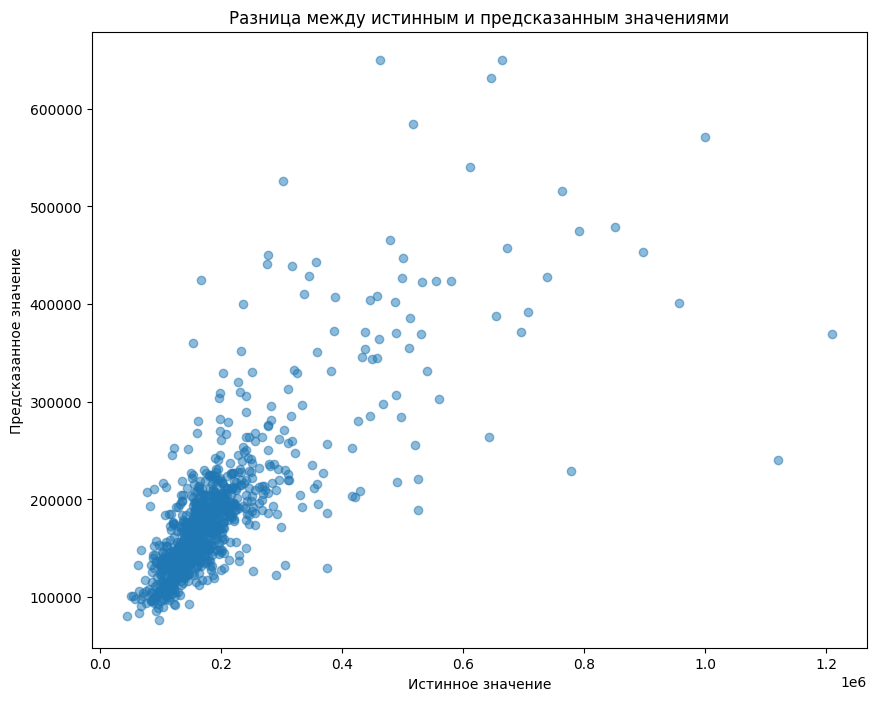

In [194]:
# –≤–∏–∑—É–∞–ª–∏–∑–∏—Ä—É–µ–º —Ä–∞–∑–Ω–∏—Ü—É –º–µ–∂–¥—É –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–º –∏ –¥–µ–π—Å—Ç–≤–∏—Ç–µ–ª—å–Ω—ã–º
plt.figure(figsize=(10,8))
plt.scatter(y_test, y_pred1, alpha=0.5)
plt.xlabel('–ò—Å—Ç–∏–Ω–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ')
plt.ylabel('–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ')
plt.title('–†–∞–∑–Ω–∏—Ü–∞ –º–µ–∂–¥—É –∏—Å—Ç–∏–Ω–Ω—ã–º –∏ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–º –∑–Ω–∞—á–µ–Ω–∏—è–º–∏')
plt.show()

–∫–∞–∫-—Ç–æ –ø–ª–æ—Ö–æ –æ–±—É—á–∏–ª–æ—Å—å

(—ç—Ç–æ –Ω–∞–∏–º–µ–Ω—å—à–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è –º–µ—Ç—Ä–∏–∫, –∫–æ—Ç–æ—Ä—ã–µ —É –º–µ–Ω—è –ø–æ–ª—É—á–∏–ª–∏—Å—å, –±—ã–ª–æ –µ—â—ë —Ö—É–∂–µüòî)

### –§—É–Ω–∫—Ü–∏—è —Å –≥–æ—Ç–æ–≤–æ–π –º–æ–¥–µ–ª—å–∫–æ–π

In [201]:
def predict_price_per_square_meter1(model, info_kv):
  info_kv_df = pd.DataFrame(info_kv, index=[0])
  predict_price_sm = model.predict(info_kv_df)
  return predict_price_sm[0]


info_kv = {
    'location': 20,
    'floor': 9,
    'floors_count': 10,
    'rooms_count': 2,
    'total_meters': 53.0,
    'year_of_construction': 2005,
    'object_type': 1,
    'have_loggia': 1,
    'parking_type': 2,
    'living_meters': 28.0,
    'kitchen_meters': 11.0,
    'ceiling_height': 2.60,
    'street': 1255,
    'underground': 1
}

price_sm = predict_price_per_square_meter1(model_1, info_kv)
print(f'–¶–µ–Ω–∞ –∑–∞ –∫–≤–∞–¥—Ä–∞—Ç–Ω—ã–π –º–µ—Ç—Ä: {price_sm}')

–¶–µ–Ω–∞ –∑–∞ –∫–≤–∞–¥—Ä–∞—Ç–Ω—ã–π –º–µ—Ç—Ä: 414475.31421384483


## –º–æ–¥–µ–ª—å–∫–∞ 2

–ò—Å–ø–æ–ª—å–∑—É–µ–º RandomForest –¥–ª—è —Ä–µ–≥—Ä–µ—Å—Å–∏–∏

In [176]:
from sklearn.ensemble import RandomForestRegressor

In [187]:
model_2 = RandomForestRegressor(n_estimators=100, random_state=42)

# –æ–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª—å–∫–∏
model_2.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [195]:
# –ø—Ä–æ–≥–Ω–æ–∑ –Ω–∞ –æ—Å–Ω–æ–≤–µ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–∏
y_pred2 = model_2.predict(X_test)

# –º–µ—Ç—Ä–∏–∫–∏ –∫–∞—á–µ—Å—Ç–≤–∞
mae = mean_absolute_error(y_test, y_pred2)
mse = mean_squared_error(y_test, y_pred2)
rmse = mean_squared_error(y_test, y_pred2, squared=False)
r2 = r2_score(y_test, y_pred2)

print(f'MAE: {mae}\nMSE: {mse}\nRMSE: {rmse}\nr2: {r2}')

MAE: 39368.7197874494
MSE: 5487717625.581185
RMSE: 74079.13083710679
r2: 0.6043462379944161


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


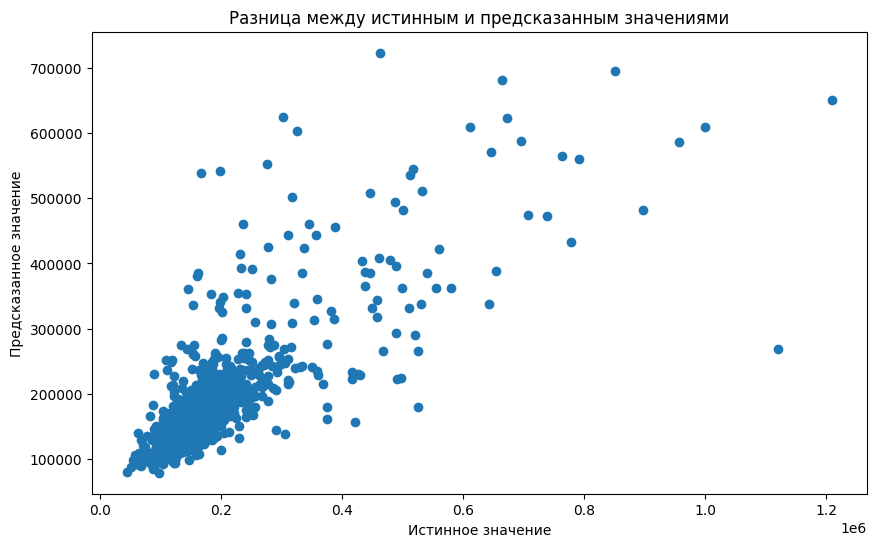

In [198]:
# –ì—Ä–∞—Ñ–∏–∫ —Ñ–∞–∫—Ç–∏—á–µ—Å–∫–∏—Ö vs –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π
plt.figure(figsize=(10, 6))
plt.scatter(x=y_test, y=y_pred2)
plt.xlabel('–ò—Å—Ç–∏–Ω–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ')
plt.ylabel('–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ')
plt.title('–†–∞–∑–Ω–∏—Ü–∞ –º–µ–∂–¥—É –∏—Å—Ç–∏–Ω–Ω—ã–º –∏ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–º –∑–Ω–∞—á–µ–Ω–∏—è–º–∏')
plt.show()

### –§—É–Ω–∫—Ü–∏—è —Å –≥–æ—Ç–æ–≤–æ–π –º–æ–¥–µ–ª—å–∫–æ–π

In [202]:
def predict_price_per_square_meter2(model, info_kv):
  info_kv_df = pd.DataFrame(info_kv, index=[0])
  predict_price_sm = model.predict(info_kv_df)
  return predict_price_sm[0]


info_kv = {
    'location': 20,
    'floor': 9,
    'floors_count': 10,
    'rooms_count': 2,
    'total_meters': 53.0,
    'year_of_construction': 2005,
    'object_type': 1,
    'have_loggia': 1,
    'parking_type': 2,
    'living_meters': 28.0,
    'kitchen_meters': 11.0,
    'ceiling_height': 2.60,
    'street': 1255,
    'underground': 1
}

price_sm = predict_price_per_square_meter2(model_2, info_kv)
print(f'–¶–µ–Ω–∞ –∑–∞ –∫–≤–∞–¥—Ä–∞—Ç–Ω—ã–π –º–µ—Ç—Ä: {price_sm}')

–¶–µ–Ω–∞ –∑–∞ –∫–≤–∞–¥—Ä–∞—Ç–Ω—ã–π –º–µ—Ç—Ä: 443833.55


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


image.png

–ò–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –≤ info_kv –≤–∑—è—Ç–∞ –∏–∑ —ç—Ç–æ–π —Å—Ç—Ä–æ—á–∫–∏, –ø–æ—Å–ª–µ–¥–Ω—è—è –∫–æ–ª–æ–Ω–∫–∞ - —Ü–µ–Ω–∞ –∑–∞ –∫–≤–∞–¥—Ä–∞—Ç–Ω—ã–π –º–µ—Ç—Ä ‚Üë

–ò—Ç–æ–≥: –º–æ–¥–µ–ª—å–∫–∏ –Ω–µ –ø–æ–ª—É—á–∏–ª–∏—Å—å :(